<a href="https://colab.research.google.com/github/rasikapnarkhede/Rice_Grain_Classifier_Using_Deep_Learning/blob/main/Rice_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [ ]:
!unzip /content/archive.zip -d /content/rice_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5508).j

In [ ]:
import os

print(os.listdir('/content/rice_dataset'))  # Should show "Rice_Image_Dataset"
print(os.listdir('/content/rice_dataset/Rice_Image_Dataset'))  # Should show class folders or images


['Rice_Image_Dataset']
['Rice_Citation_Request.txt', 'Arborio', 'Basmati', 'Karacadag', 'Ipsala', 'Jasmine']


In [ ]:
images_path = '/content/rice_dataset/Rice_Image_Dataset'

In [ ]:
from glob import glob

images = glob(os.path.join(images_path, '**', '*.jpg'), recursive=True)
print(f"Found {len(images)} images")

Found 75000 images


In [ ]:
len(images)

75000

In [ ]:
print(images[:5])

['/content/rice_dataset/Rice_Image_Dataset/Arborio/Arborio (5104).jpg', '/content/rice_dataset/Rice_Image_Dataset/Arborio/Arborio (7152).jpg', '/content/rice_dataset/Rice_Image_Dataset/Arborio/Arborio (9499).jpg', '/content/rice_dataset/Rice_Image_Dataset/Arborio/Arborio (14846).jpg', '/content/rice_dataset/Rice_Image_Dataset/Arborio/Arborio (10616).jpg']


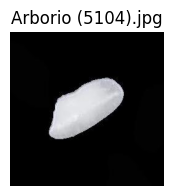

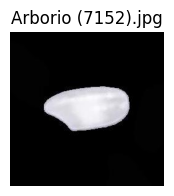

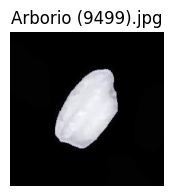

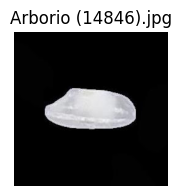

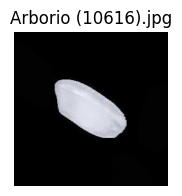

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Show first 5 images
for i in range(5):
    img = cv2.imread(images[i])               # Load image with OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(os.path.basename(images[i]))
    plt.axis('off')
    plt.show()


In [ ]:
from pathlib import Path
from sklearn import preprocessing

# Get all image paths
image_paths = list(Path('/content/rice_dataset/Rice_Image_Dataset').rglob('*.jpg'))

# Get class names from parent folders
image_names = [p.parent.name for p in image_paths]

# Encode class names into labels
label_encoder = preprocessing.LabelEncoder()
image_labels = label_encoder.fit_transform(image_names)


In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame()
df['link'] = np.array(image_link, dtype=str)  # Fixed line
df['name'] = image_name
df['label'] = image_label

print(df.head())


                                                link     name  label
0  /content/rice_dataset/Rice_Image_Dataset/Arbor...  Arborio      0
1  /content/rice_dataset/Rice_Image_Dataset/Arbor...  Arborio      0
2  /content/rice_dataset/Rice_Image_Dataset/Arbor...  Arborio      0
3  /content/rice_dataset/Rice_Image_Dataset/Arbor...  Arborio      0
4  /content/rice_dataset/Rice_Image_Dataset/Arbor...  Arborio      0


In [ ]:
df

,link,name,label
0,/content/rice_dataset/Rice_Image_Dataset/Arbor...,Arborio,0
1,/content/rice_dataset/Rice_Image_Dataset/Arbor...,Arborio,0
2,/content/rice_dataset/Rice_Image_Dataset/Arbor...,Arborio,0
3,/content/rice_dataset/Rice_Image_Dataset/Arbor...,Arborio,0
4,/content/rice_dataset/Rice_Image_Dataset/Arbor...,Arborio,0
...,...,...,...
74995,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74996,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74997,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74998,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3


<Axes: xlabel='name'>

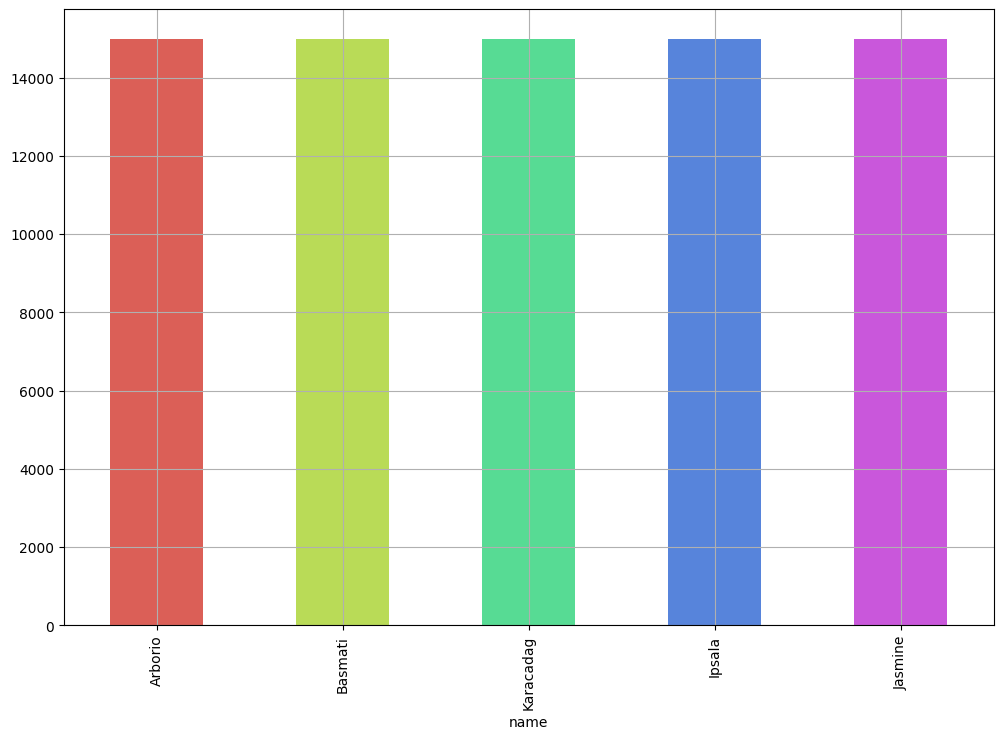

In [ ]:
import seaborn as sns

df.name.value_counts().plot(kind='bar', figsize=(12, 8), grid=True, color=sns.color_palette('hls', df.name.nunique()))


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,241 (2.85 MB)

 Trainable params: 249,413 (974.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,828 (1.90 MB)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state = 1)

In [ ]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical',
    subset = 'training'

)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical'
)

Found 52500 validated image filenames belonging to 5 classes.
Found 22500 validated image filenames belonging to 5 classes.


In [ ]:
model.evaluate(test_images)

704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9769 - loss: 0.0776


[0.0801592469215393, 0.9766222238540649]

In [ ]:
from sklearn.metrics import classification_report  # Import classification_report

# Get predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels for the test set
true_labels = test_df['label'].values  # Assuming 'label' column holds true labels

# Print the classification report
print(classification_report(true_labels, predicted_labels))

704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step
              precision    recall  f1-score   support

           0       0.21      0.20      0.21      4545
           1       0.19      0.18      0.19      4510
           2       0.19      0.18      0.19      4457
           3       0.19      0.20      0.20      4482
           4       0.20      0.22      0.21      4506

    accuracy                           0.20     22500
   macro avg       0.20      0.20      0.20     22500
weighted avg       0.20      0.20      0.20     22500



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd

# 1. Load and preprocess image data
def load_images(df, img_size=(28, 28)):
    images = []
    for path in df['link']:
        img = load_img(path, target_size=img_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

X_train = load_images(train_df)
X_test = load_images(test_df)

X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(train_df['name'])
y_test_encoded = le.transform(test_df['name'])

y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# 3. Define CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 🔥 Softmax for multi-class

# 4. Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=3, batch_size=32, validation_data=(X_test, y_test_onehot))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 130s 78ms/step - accuracy: 0.8875 - loss: 0.2880 - val_accuracy: 0.9665 - val_loss: 0.0907
Epoch 2/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 114s 70ms/step - accuracy: 0.9739 - loss: 0.0772 - val_accuracy: 0.9651 - val_loss: 0.1026
Epoch 3/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 113s 69ms/step - accuracy: 0.9790 - loss: 0.0631 - val_accuracy: 0.9835 - val_loss: 0.0503


In [ ]:
from sklearn.metrics import classification_report  # Import classification_report

# Get predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels for the test set
true_labels = test_df['label'].values  # Assuming 'label' column holds true labels

# Print the classification report
print(classification_report(true_labels, predicted_labels))

704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step
              precision    recall  f1-score   support

           0       0.20      0.19      0.19      4545
           1       0.20      0.22      0.21      4510
           2       0.20      0.22      0.21      4457
           3       0.20      0.19      0.19      4482
           4       0.20      0.20      0.20      4506

    accuracy                           0.20     22500
   macro avg       0.20      0.20      0.20     22500
weighted avg       0.20      0.20      0.20     22500



In [ ]:
model.save("rice_cnn_model.h5")

# Load model (in Streamlit or Flask)
from tensorflow.keras.models import load_model
model = load_model("rice_cnn_model.h5")